# CODE TO CLASSIFY TRAFFIC SIGNS USING LE-NET ARCHITECTURE IN KERAS

# STEP 0: PROBLEM STATEMENT

- The dataset contains 43 different classes of images. 
- Classes are as listed below: 

    - ( 0, b'Speed limit (20km/h)') ( 1, b'Speed limit (30km/h)')
    - ( 2, b'Speed limit (50km/h)') ( 3, b'Speed limit (60km/h)')
    - ( 4, b'Speed limit (70km/h)') ( 5, b'Speed limit (80km/h)')
    - ( 6, b'End of speed limit (80km/h)') ( 7, b'Speed limit (100km/h)')
    - ( 8, b'Speed limit (120km/h)') ( 9, b'No passing')
    - (10, b'No passing for vehicles over 3.5 metric tons')
    - (11, b'Right-of-way at the next intersection') (12, b'Priority road')
    - (13, b'Yield') (14, b'Stop') (15, b'No vehicles')
    - (16, b'Vehicles over 3.5 metric tons prohibited') (17, b'No entry')
    - (18, b'General caution') (19, b'Dangerous curve to the left')
    - (20, b'Dangerous curve to the right') (21, b'Double curve')
    - (22, b'Bumpy road') (23, b'Slippery road')
    - (24, b'Road narrows on the right') (25, b'Road work')
    - (26, b'Traffic signals') (27, b'Pedestrians') (28, b'Children crossing')
    - (29, b'Bicycles crossing') (30, b'Beware of ice/snow')
    - (31, b'Wild animals crossing')
    - (32, b'End of all speed and passing limits') (33, b'Turn right ahead')
    - (34, b'Turn left ahead') (35, b'Ahead only') (36, b'Go straight or right')
    - (37, b'Go straight or left') (38, b'Keep right') (39, b'Keep left')
    - (40, b'Roundabout mandatory') (41, b'End of no passing')
    - (42, b'End of no passing by vehicles over 3.5 metric tons')
    

# Step 1: IMPORT LIBRARIES AND DATASET

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

C:\Users\Natan\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
with open('./traffic-signs-data/train.p', mode='rb') as training_data:
    train = pickle.load(training_data)
with open('./traffic-signs-data/valid.p', mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open('./traffic-signs-data/test.p', mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [5]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [6]:
X_train.shape

(34799, 32, 32, 3)

In [7]:
y_train.shape

(34799,)

In [8]:
X_validation.shape

(4410, 32, 32, 3)

In [9]:
y_validation.shape

(4410,)

In [10]:
X_test.shape

(12630, 32, 32, 3)

In [11]:
y_test.shape

(12630,)

# STEP 2: IMAGE EXPLORATION

37

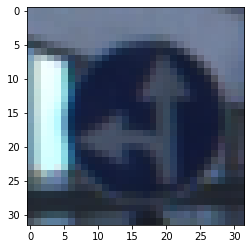

In [12]:
i = 5000
plt.imshow(X_train[i])
y_train[i]

4

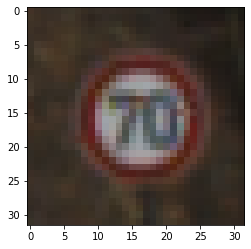

In [13]:
i = 1000
plt.imshow(X_validation[i])
y_validation[i]

1

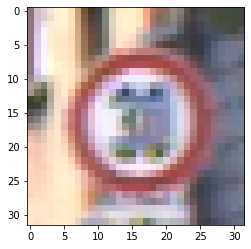

In [14]:
i = 100
plt.imshow(X_test[i])
y_test[i]

# STEP 3: DATA PREPARATION

In [15]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [16]:
X_train_gray = np.sum(X_train/3, axis = 3, keepdims = True)
X_validation_gray = np.sum(X_validation/3, axis = 3, keepdims = True)
X_test_gray = np.sum(X_test/3, axis = 3, keepdims = True)

In [17]:
X_train_gray.shape

(34799, 32, 32, 1)

In [18]:
X_validation_gray.shape

(4410, 32, 32, 1)

In [19]:
X_test_gray.shape

(12630, 32, 32, 1)

In [20]:
X_train_gray_norm = (X_train_gray - 128)/128
X_test_gray_norm = (X_test_gray - 128)/128
X_validation_gray_norm = (X_validation_gray - 128)/128

In [21]:
X_train_gray_norm

array([[[[-0.80989583],
         [-0.8203125 ],
         [-0.81510417],
         ...,
         [-0.79427083],
         [-0.79947917],
         [-0.78125   ]],

        [[-0.81770833],
         [-0.8359375 ],
         [-0.80729167],
         ...,
         [-0.78125   ],
         [-0.79947917],
         [-0.77604167]],

        [[-0.82552083],
         [-0.84635417],
         [-0.79947917],
         ...,
         [-0.79947917],
         [-0.79947917],
         [-0.78645833]],

        ...,

        [[-0.7734375 ],
         [-0.78385417],
         [-0.77083333],
         ...,
         [-0.78645833],
         [-0.78385417],
         [-0.765625  ]],

        [[-0.7890625 ],
         [-0.78385417],
         [-0.77083333],
         ...,
         [-0.79427083],
         [-0.78125   ],
         [-0.76302083]],

        [[-0.78125   ],
         [-0.77083333],
         [-0.76822917],
         ...,
         [-0.7734375 ],
         [-0.77864583],
         [-0.7734375 ]]],


       [[[-0.70052083],


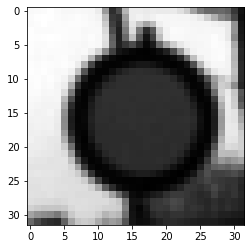

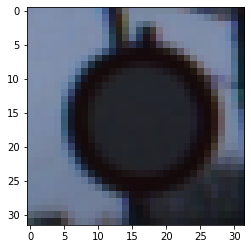

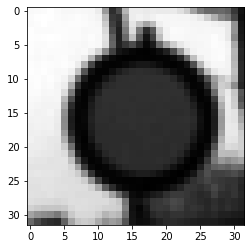

In [22]:
i = 610
plt.imshow(X_train_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap = 'gray')

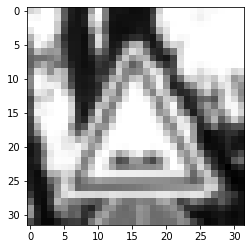

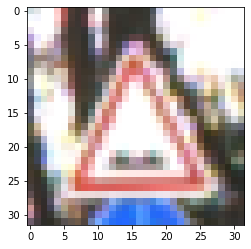

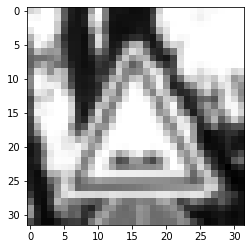

In [28]:
i = 610
plt.imshow(X_validation_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(X_validation[i])
plt.figure()
plt.imshow(X_validation_gray_norm[i].squeeze(), cmap = 'gray')

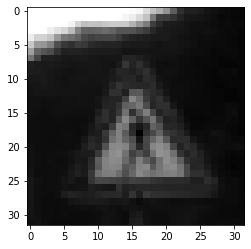

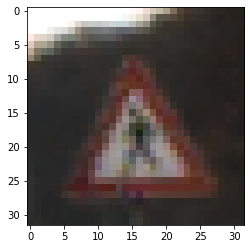

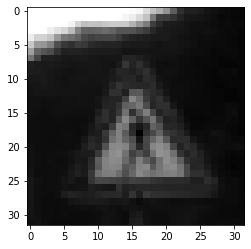

In [23]:
i = 610
plt.imshow(X_test_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(X_test[i])
plt.figure()
plt.imshow(X_test_gray_norm[i].squeeze(), cmap = 'gray')

# STEP 4: MODEL TRAINING

The model consists of the following layers:

* STEP 1: THE FIRST CONVOLUTONAL LAYER 
    - Input = 32x32x1
    - Output = 28x28x6
    - Output = (Input-filter+1)/Stride* => (32-5+1)/1=28
    - Used a 5x5 Filter with input depth of 3 and otuput depth of 6
    - Apply a RELU Activation function to the output
    - Pooling for input, Input = 28x28x6 and Output = 14x14x6
    
    * Stride is the amount by which the kernel is shifted when the kernel is passed over the image.

- STEP 2: THE SECOND CONVOLUTIONAL LAYER 
    - Input = 14x14x6
    - Output = 10x10x16
    - Layer 2: Convolutional layer with Output = 10x10x16
    - Output = (Input-filter+1)/strides => 10 = 14-5+1/1
    - Apply a RELU Activation function to the output
    - Pooling with Input = 10x10x16 and Output = 5x5x16

- STEP 3: FLATTENING THE NETWORK
    - Flatten the network with Input = 5x5x16 and Output = 400

- STEP 4: FULLY CONNECTED LAYER
    - Layer 3: Fully Connected layer with Input = 400 and Output = 120
    - Apply a RELU Activation function to the output

- STEP 5: ANOTHER FULLY CONNECTED LAYER
    - Layer 4: Fully Connected Layer with Input = 120 and Output = 84
    - Apply a RELU Activation function to the output

- STEP 6: FULLY CONNECTED LAYER
    - Layer 5: Fully Connected layer with Input = 84 and Output = 43

In [24]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [26]:
cnn_model = Sequential()

cnn_model.add(Conv2D(filters = 6, kernel_size=(5,5), activation = 'relu', input_shape = (32,32,1)))
cnn_model.add(AveragePooling2D())

cnn_model.add(Conv2D(filters = 16, kernel_size=(5,5), activation = 'relu'))
cnn_model.add(AveragePooling2D())

cnn_model.add(Flatten())

cnn_model.add(Dense(units = 120, activation = 'relu'))

cnn_model.add(Dense(units = 84, activation = 'relu'))

cnn_model.add(Dense(units = 43, activation = 'softmax'))

In [27]:
cnn_model.compile(loss = 'sparse_categorical_crossentropy', optimizer = Adam(learning_rate = 0.001), metrics = ['accuracy'])

In [28]:
history = cnn_model.fit(X_train_gray_norm,
             y_train,
             batch_size = 500,
             epochs = 100,
             verbose = 1,
             validation_data = (X_validation_gray_norm, y_validation))

Epoch 1/100
70/70 [==============================] - 5s 65ms/step - loss: 3.1972 - accuracy: 0.1695 - val_loss: 2.7838 - val_accuracy: 0.2748
Epoch 2/100
70/70 [==============================] - 4s 58ms/step - loss: 1.7532 - accuracy: 0.5172 - val_loss: 1.4167 - val_accuracy: 0.6014
Epoch 3/100
70/70 [==============================] - 4s 54ms/step - loss: 0.9541 - accuracy: 0.7307 - val_loss: 1.0175 - val_accuracy: 0.6973
Epoch 4/100
70/70 [==============================] - 4s 54ms/step - loss: 0.6732 - accuracy: 0.8122 - val_loss: 0.8580 - val_accuracy: 0.7392
Epoch 5/100
70/70 [==============================] - 4s 54ms/step - loss: 0.5222 - accuracy: 0.8576 - val_loss: 0.7513 - val_accuracy: 0.7925
Epoch 6/100
70/70 [==============================] - 4s 54ms/step - loss: 0.4226 - accuracy: 0.8864 - val_loss: 0.7304 - val_accuracy: 0.7912
Epoch 7/100
70/70 [==============================] - 4s 55ms/step - loss: 0.3639 - accuracy: 0.9016 - val_loss: 0.6999 - val_accuracy: 0.8007
Epoch 

70/70 [==============================] - 4s 57ms/step - loss: 0.0133 - accuracy: 0.9966 - val_loss: 0.8231 - val_accuracy: 0.8821
Epoch 59/100
70/70 [==============================] - 4s 57ms/step - loss: 0.0365 - accuracy: 0.9881 - val_loss: 0.8201 - val_accuracy: 0.8748
Epoch 60/100
70/70 [==============================] - 4s 59ms/step - loss: 0.0289 - accuracy: 0.9915 - val_loss: 0.8373 - val_accuracy: 0.8723
Epoch 61/100
70/70 [==============================] - 4s 60ms/step - loss: 0.0110 - accuracy: 0.9971 - val_loss: 0.6918 - val_accuracy: 0.8839
Epoch 62/100
70/70 [==============================] - 4s 58ms/step - loss: 0.0058 - accuracy: 0.9992 - val_loss: 0.7745 - val_accuracy: 0.8866
Epoch 63/100
70/70 [==============================] - 4s 58ms/step - loss: 0.0052 - accuracy: 0.9992 - val_loss: 0.8215 - val_accuracy: 0.8771
Epoch 64/100
70/70 [==============================] - 4s 57ms/step - loss: 0.0042 - accuracy: 0.9994 - val_loss: 0.8050 - val_accuracy: 0.8914
Epoch 65/100

# STEP 5: MODEL EVALUATION

In [29]:
score = cnn_model.evaluate(X_test_gray_norm, y_test)
print('Test Accuracy: {}'.format(score[1]))

395/395 [==============================] - 1s 2ms/step - loss: 1.3785 - accuracy: 0.8888
Test Accuracy: 0.8887569308280945


In [30]:
history.history.keys()                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

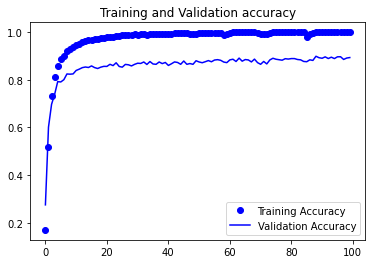

In [33]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

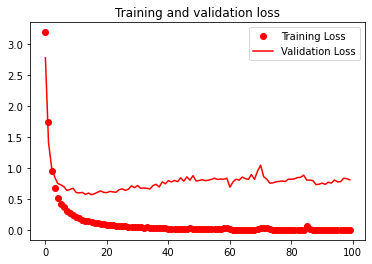

In [34]:
plt.plot(epochs, loss, 'ro', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()